# Point plots and heatmaps

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
penguins_data = sns.load_dataset('penguins')

penguins_data.describe()
penguins_data.info()
penguins_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
available_pallets = sns.palettes.SEABORN_PALETTES.keys()
print('Availiable palette', available_pallets)

Availiable palette dict_keys(['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'])


# Point Plot with Seaborn

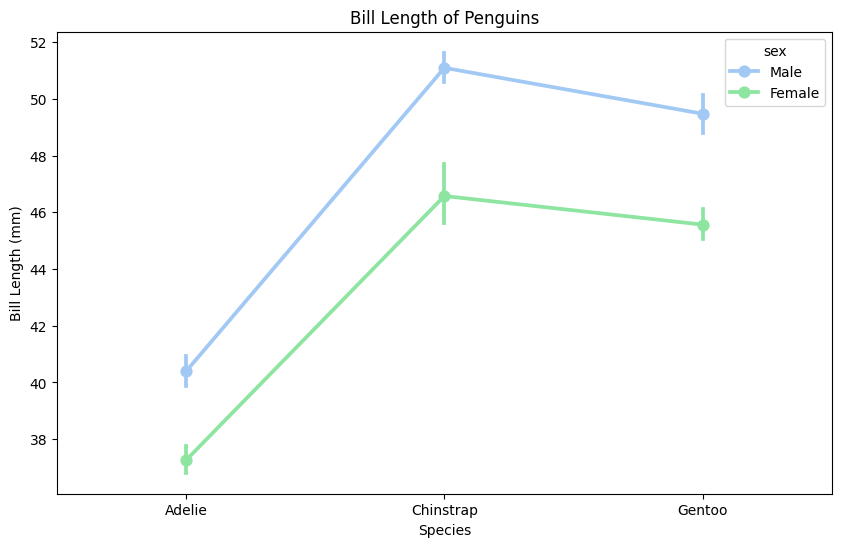

In [ ]:
sns.set_palette('pastel6')

plt.figure(figsize=(10, 6))
sns.pointplot(x='species', y='bill_length_mm', data=penguins_data, hue='sex') # use hue to differentiate the data points for additional category
plt.title('Bill Length of Penguins')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')
plt.show()

# Heatmap 

In [16]:
numerical_p = penguins_data[['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
numerical_p

,bill_depth_mm,bill_length_mm,flipper_length_mm,body_mass_g
0,18.7,39.1,181.0,3750.0
1,17.4,39.5,186.0,3800.0
2,18.0,40.3,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,19.3,36.7,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,14.3,46.8,215.0,4850.0
341,15.7,50.4,222.0,5750.0
342,14.8,45.2,212.0,5200.0


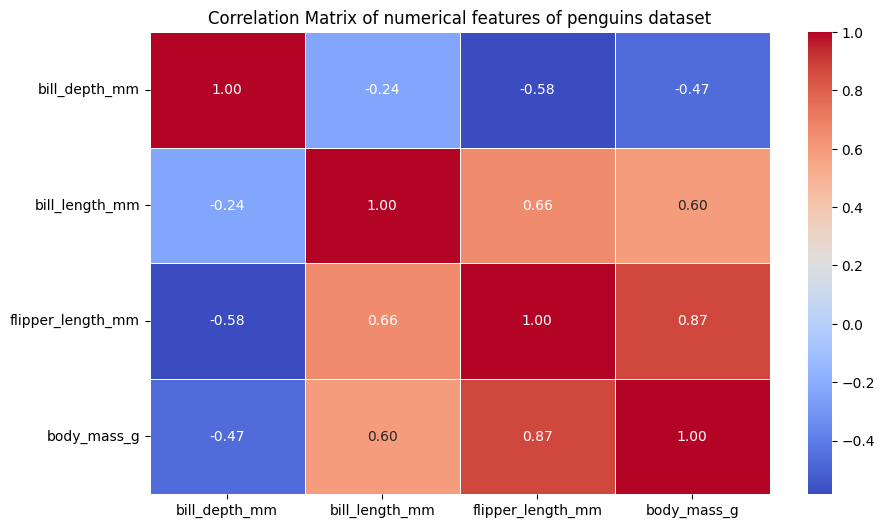

In [24]:
plt.figure(figsize=(10, 6))
corr_matrix = numerical_p.corr() # compute the correlation matrix between the numerical features
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt = '.2f' ) # cmap is the color map from cool to warm, annot is to show the values in the cells
plt.title('Correlation Matrix of numerical features of penguins dataset')
plt.show()

# Multi-chart Grid

Text(0.5, 1.0, 'Correlation Matrix of numerical features of penguins dataset')

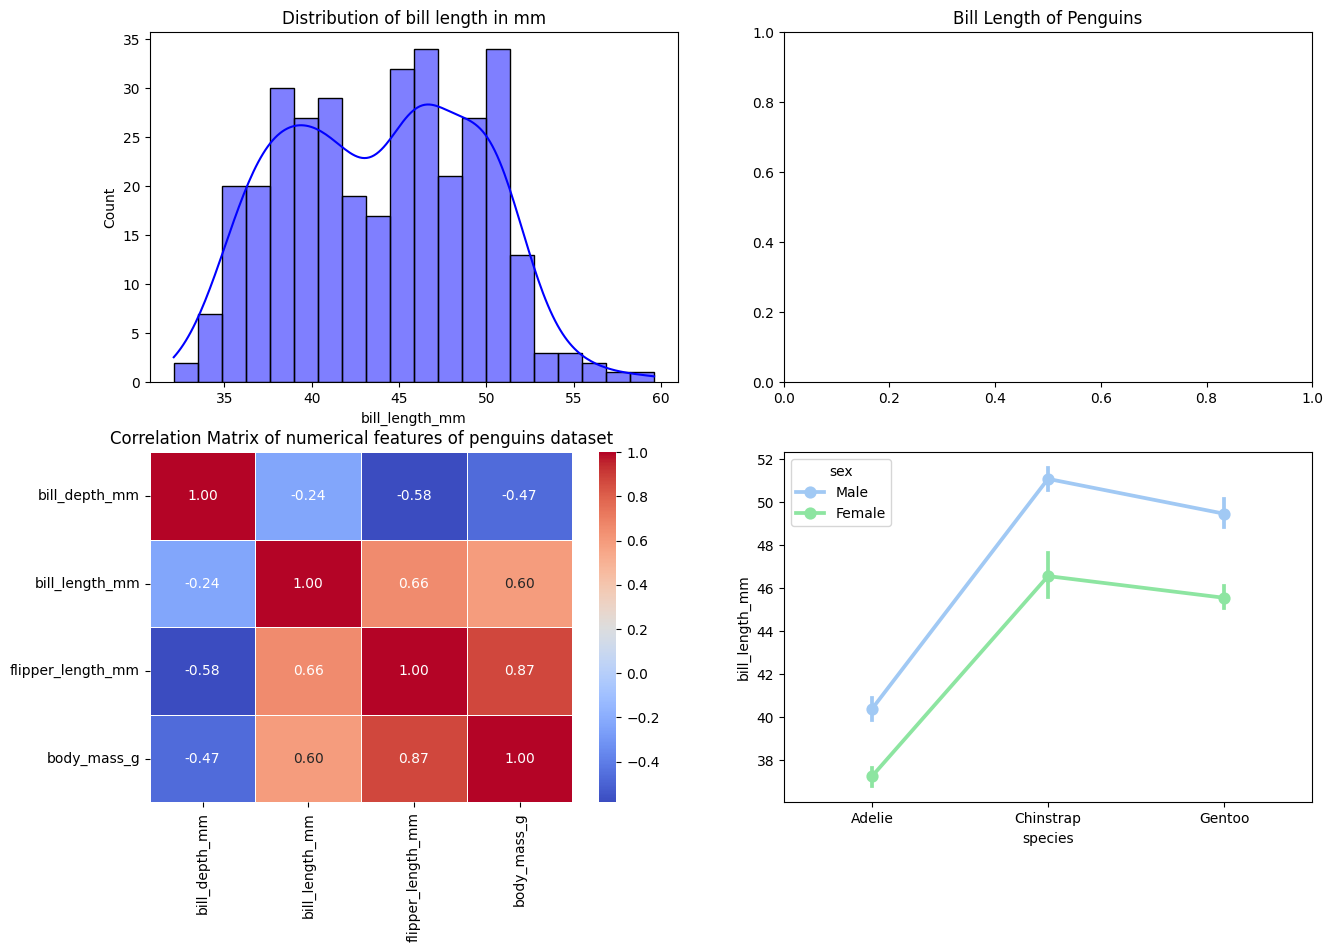

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograms 
sns.histplot(penguins_data['bill_length_mm'], bins=20, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of bill length in mm')

#point plot
sns.pointplot(x='species', y='bill_length_mm', data=penguins_data, hue='sex') # use hue to differentiate the data points for additional category
axes[0, 1].set_title('Bill Length of Penguins')

# Heatmap 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt = '.2f', ax=axes[1, 0]) # cmap is the color map from cool to warm, annot is to show the values in the cells
axes[1, 0].set_title('Correlation Matrix of numerical features of penguins dataset')